In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import seaborn as sns

In [24]:
MPdata = pd.read_csv('MPcombined.csv')
MHdata = pd.read_csv('MHcombined.csv')

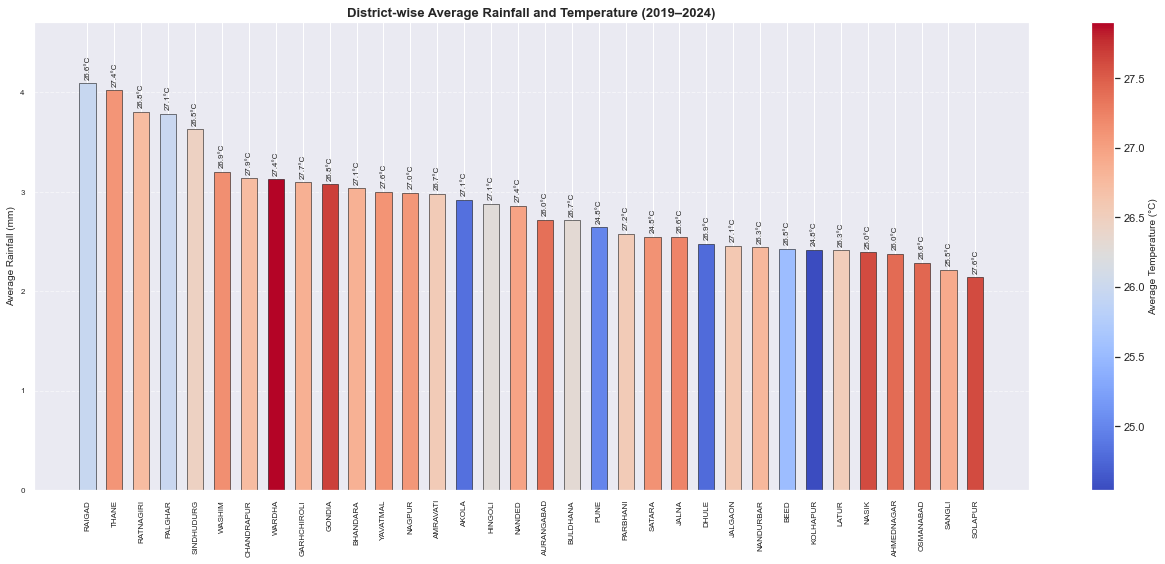

In [37]:
df = MHdata
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df = df[(df['year'] >= 2019) & (df['year'] <= 2024)]

district_stats = df.groupby('District').agg(
    mean_rainfall=('rainfall_mm', 'mean'),
    mean_temperature=('mean', 'mean')
).reset_index()

norm = mcolors.Normalize(vmin=district_stats['mean_temperature'].min(), 
                         vmax=district_stats['mean_temperature'].max())
cmap = cm.get_cmap('coolwarm')
colors = cmap(norm(district_stats['mean_temperature']))

district_stats = district_stats.sort_values('mean_rainfall', ascending=False)

plt.figure(figsize=(18, 8))
bars = plt.bar(
    district_stats['District'], 
    district_stats['mean_rainfall'], 
    color=colors, 
    edgecolor='black',
    linewidth=0.5,
    width=0.6
)

max_height = district_stats['mean_rainfall'].max()
plt.ylim(0, max_height * 1.15)

for bar, temp in zip(bars, district_stats['mean_temperature']):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + max_height * 0.01,
             f"{temp:.1f}°C", ha='center', va='bottom', fontsize=8, rotation=90)

plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.xticks(rotation=90, fontsize=8)
plt.yticks(fontsize=8)
plt.title("District-wise Average Rainfall and Temperature (2019–2024)", fontsize=13, fontweight='bold')
plt.ylabel("Average Rainfall (mm)", fontsize=10)

sm = cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm)
cbar.set_label('Average Temperature (°C)', fontsize=10)

plt.tight_layout()
plt.show()



C:\Users\shaha\AppData\Local\Temp\ipykernel_26092\2914016448.py:44: UserWarning: Glyph 9748 (\N{UMBRELLA WITH RAIN DROPS}) missing from current font.
  plt.tight_layout()
C:\Users\shaha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 9748 (\N{UMBRELLA WITH RAIN DROPS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


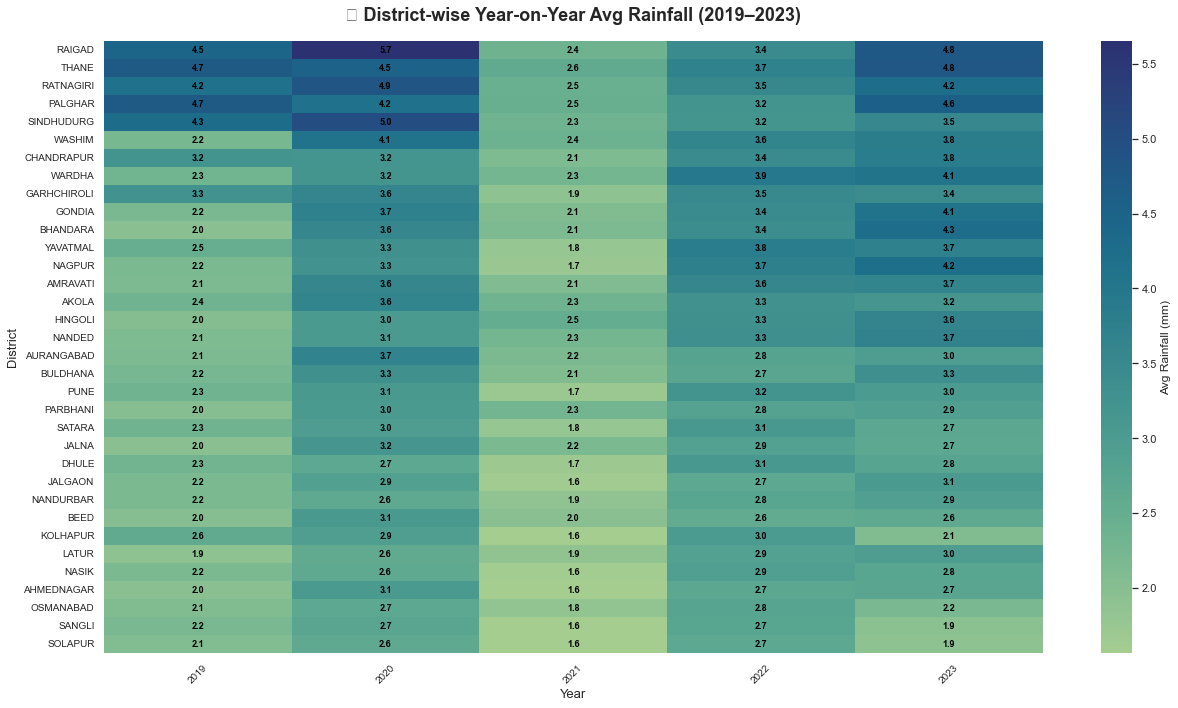

In [38]:

# 1. Convert and filter
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df = df[(df['year'] >= 2019) & (df['year'] < 2024)]

# 2. Group and pivot
pivot_df = df.groupby(['District', 'year'])['rainfall_mm'].mean().unstack()

# 3. Sort districts for visual pattern
pivot_df = pivot_df.loc[pivot_df.mean(axis=1).sort_values(ascending=False).index]

# 4. Set plot theme and figure size
sns.set_theme(style="white")
sns.set(font_scale=1.0)
plt.figure(figsize=(18, 10))

# 5. Define elegant colormap
cmap = sns.color_palette("crest", as_cmap=True)  # or "rocket_r", "viridis", "YlGnBu"

# 6. Plot
ax = sns.heatmap(
    pivot_df,
    cmap=cmap,
    annot=True,
    fmt=".1f",
    linewidths=0,  # Remove cell borders
    linecolor='white',
    cbar_kws={'label': 'Avg Rainfall (mm)'},
    annot_kws={"fontsize": 9, "weight": "bold", "color": "black"}  # Use white if cmap is dark
)

# 7. Titles and labels
ax.set_title("☔ District-wise Year-on-Year Avg Rainfall (2019–2023)", fontsize=18, fontweight='bold', pad=20)
ax.set_xlabel("Year", fontsize=13)
ax.set_ylabel("District", fontsize=13)

# 8. Ticks
plt.xticks(rotation=45, fontsize=10)
plt.yticks(rotation=0, fontsize=10)

# 9. Final touches
ax.grid(False)            # No internal gridlines
ax.set_facecolor('white') # Plot background color
plt.tight_layout()
plt.show()

C:\Users\shaha\AppData\Local\Temp\ipykernel_26092\3689422722.py:41: UserWarning: Glyph 127777 (\N{THERMOMETER}) missing from current font.
  plt.tight_layout()
C:\Users\shaha\AppData\Local\Temp\ipykernel_26092\3689422722.py:41: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from current font.
  plt.tight_layout()
C:\Users\shaha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 127777 (\N{THERMOMETER}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\shaha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


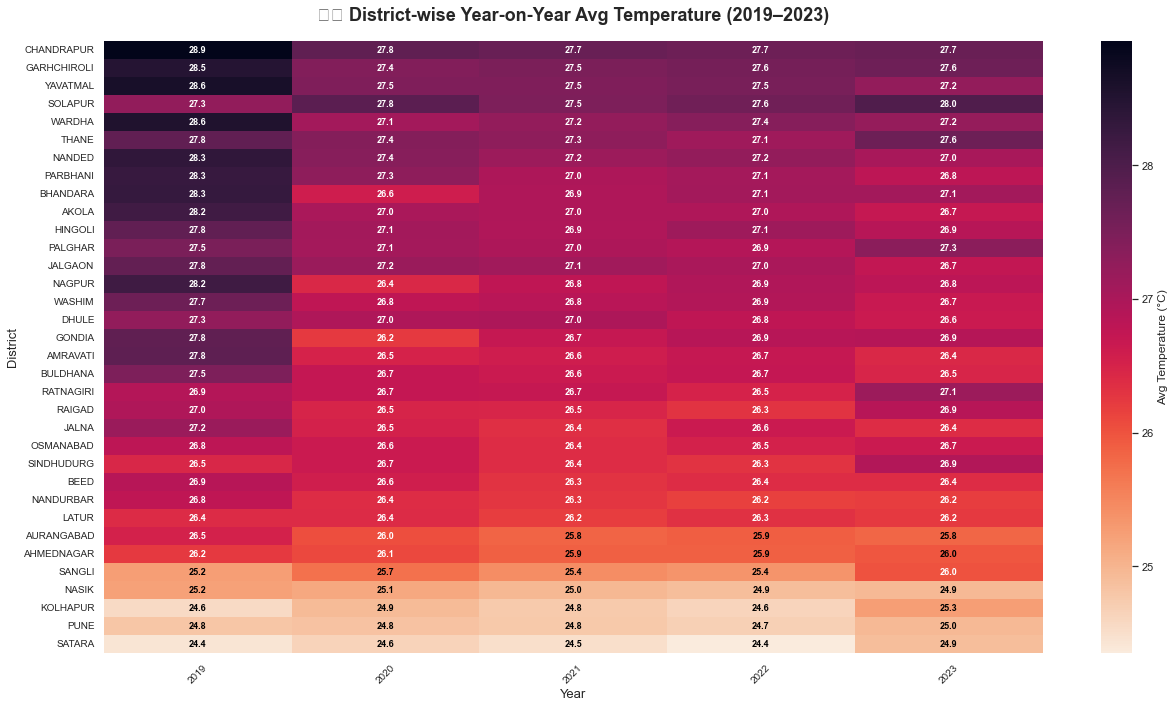

In [39]:
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df = df[(df['year'] >= 2019) & (df['year'] < 2024)]
temp_df = df.groupby(['District', 'year'])['mean'].mean().unstack()
temp_df = temp_df.loc[temp_df.mean(axis=1).sort_values(ascending=False).index]
sns.set_theme(style="white")
sns.set(font_scale=1.0)
plt.figure(figsize=(18, 10))

cmap = sns.color_palette("rocket_r", as_cmap=True)

ax = sns.heatmap(
    temp_df,
    cmap=cmap,
    annot=False,
    fmt=".1f",
    linewidths=0,
    linecolor='white',
    cbar_kws={'label': 'Avg Temperature (°C)'}
)

for i in range(temp_df.shape[0]):
    for j in range(temp_df.shape[1]):
        value = temp_df.iloc[i, j]
        if pd.notnull(value):
            color_val = cmap((value - temp_df.min().min()) / (temp_df.max().max() - temp_df.min().min()))
            r, g, b = color_val[:3]
            brightness = (r * 299 + g * 587 + b * 114) / 1000
            text_color = 'black' if brightness > 0.5 else 'white'
            ax.text(j + 0.5, i + 0.5, f"{value:.1f}", ha='center', va='center',
                    color=text_color, fontsize=9, fontweight='bold')

ax.set_title("🌡️ District-wise Year-on-Year Avg Temperature (2019–2023)", fontsize=18, fontweight='bold', pad=20)
ax.set_xlabel("Year", fontsize=13)
ax.set_ylabel("District", fontsize=13)

plt.xticks(rotation=45, fontsize=10)
plt.yticks(rotation=0, fontsize=10)
ax.grid(False)
ax.set_facecolor('white')
plt.tight_layout()
plt.show()

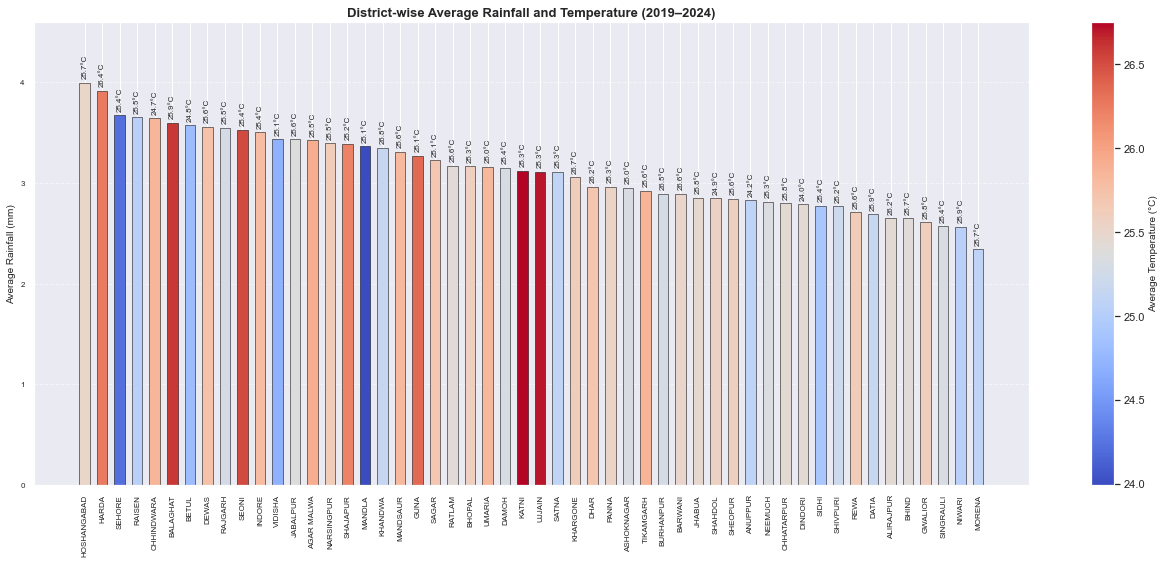

In [50]:
df = MPdata
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df = df[(df['year'] >= 2019) & (df['year'] <= 2024)]

district_stats = df.groupby('District').agg(
    mean_rainfall=('rainfall_mm', 'mean'),
    mean_temperature=('mean', 'mean')
).reset_index()

norm = mcolors.Normalize(vmin=district_stats['mean_temperature'].min(), 
                         vmax=district_stats['mean_temperature'].max())
cmap = cm.get_cmap('coolwarm')
colors = cmap(norm(district_stats['mean_temperature']))

district_stats = district_stats.sort_values('mean_rainfall', ascending=False)

plt.figure(figsize=(18, 8))
bars = plt.bar(
    district_stats['District'], 
    district_stats['mean_rainfall'], 
    color=colors, 
    edgecolor='black',
    linewidth=0.5,
    width=0.6
)

max_height = district_stats['mean_rainfall'].max()
plt.ylim(0, max_height * 1.15)

for bar, temp in zip(bars, district_stats['mean_temperature']):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + max_height * 0.01,
             f"{temp:.1f}°C", ha='center', va='bottom', fontsize=8, rotation=90)

plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.xticks(rotation=90, fontsize=8)
plt.yticks(fontsize=8)
plt.title("District-wise Average Rainfall and Temperature (2019–2024)", fontsize=13, fontweight='bold')
plt.ylabel("Average Rainfall (mm)", fontsize=10)

sm = cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm)
cbar.set_label('Average Temperature (°C)', fontsize=10)

plt.tight_layout()
plt.show()



C:\Users\shaha\AppData\Local\Temp\ipykernel_26092\3950241225.py:51: UserWarning: Glyph 9748 (\N{UMBRELLA WITH RAIN DROPS}) missing from current font.
  plt.tight_layout()
C:\Users\shaha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 9748 (\N{UMBRELLA WITH RAIN DROPS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


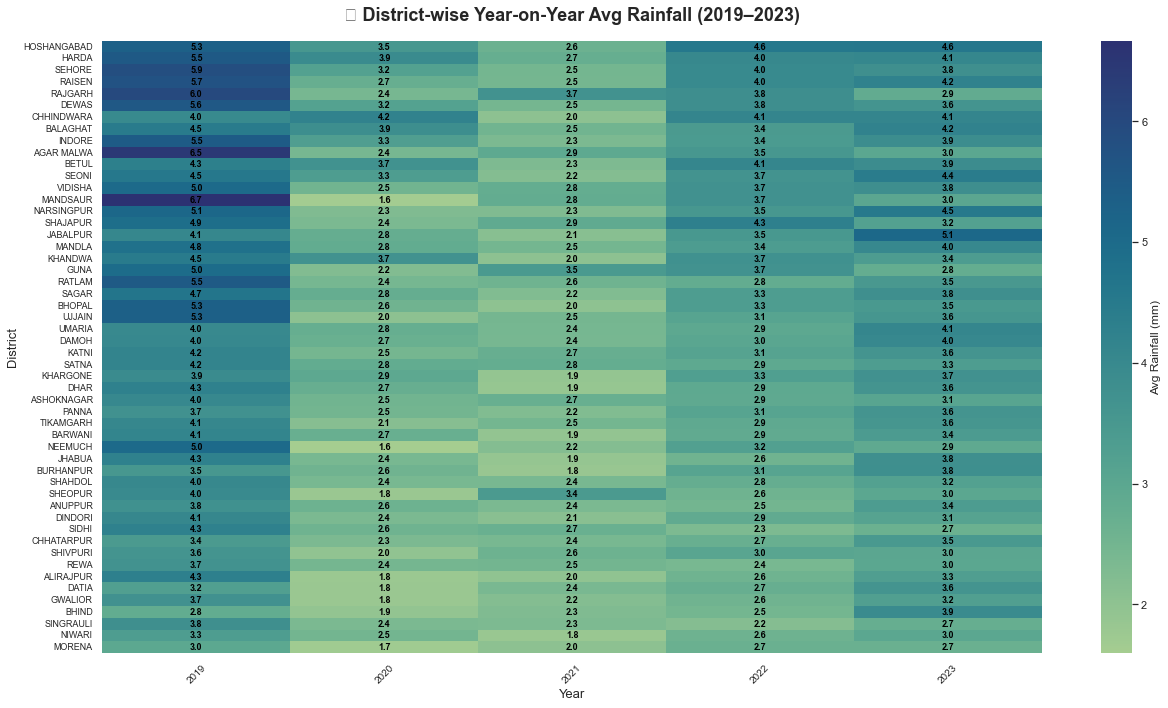

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Convert and filter
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df = df[(df['year'] >= 2019) & (df['year'] < 2024)]

# 2. Group and pivot
pivot_df = df.groupby(['District', 'year'])['rainfall_mm'].mean().unstack()

# 3. Sort districts for visual pattern
pivot_df = pivot_df.loc[pivot_df.mean(axis=1).sort_values(ascending=False).index]

# 4. Set plot theme and figure size
sns.set_theme(style="white")
sns.set(font_scale=1.0)
plt.figure(figsize=(18, 10))

# 5. Define elegant colormap
cmap = sns.color_palette("crest", as_cmap=True)  # options: "rocket_r", "viridis", "YlGnBu"

# 6. Plot
ax = sns.heatmap(
    pivot_df,
    cmap=cmap,
    annot=True,
    fmt=".1f",
    linewidths=0,
    linecolor='white',
    cbar_kws={'label': 'Avg Rainfall (mm)'},
    annot_kws={"fontsize": 9, "weight": "bold", "color": "black"}
)

# 7. Force all district names to show
ax.set_yticks([i + 0.5 for i in range(len(pivot_df.index))])
ax.set_yticklabels(pivot_df.index, rotation=0, fontsize=9)

# 8. Titles and labels
ax.set_title("☔ District-wise Year-on-Year Avg Rainfall (2019–2023)", fontsize=18, fontweight='bold', pad=20)
ax.set_xlabel("Year", fontsize=13)
ax.set_ylabel("District", fontsize=13)

# 9. X-axis ticks
plt.xticks(rotation=45, fontsize=10)

# 10. Final touches
ax.grid(False)
ax.set_facecolor('white')
plt.tight_layout()
plt.show()

C:\Users\shaha\AppData\Local\Temp\ipykernel_26092\2121029310.py:53: UserWarning: Glyph 127777 (\N{THERMOMETER}) missing from current font.
  plt.tight_layout()
C:\Users\shaha\AppData\Local\Temp\ipykernel_26092\2121029310.py:53: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from current font.
  plt.tight_layout()
C:\Users\shaha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 127777 (\N{THERMOMETER}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\shaha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


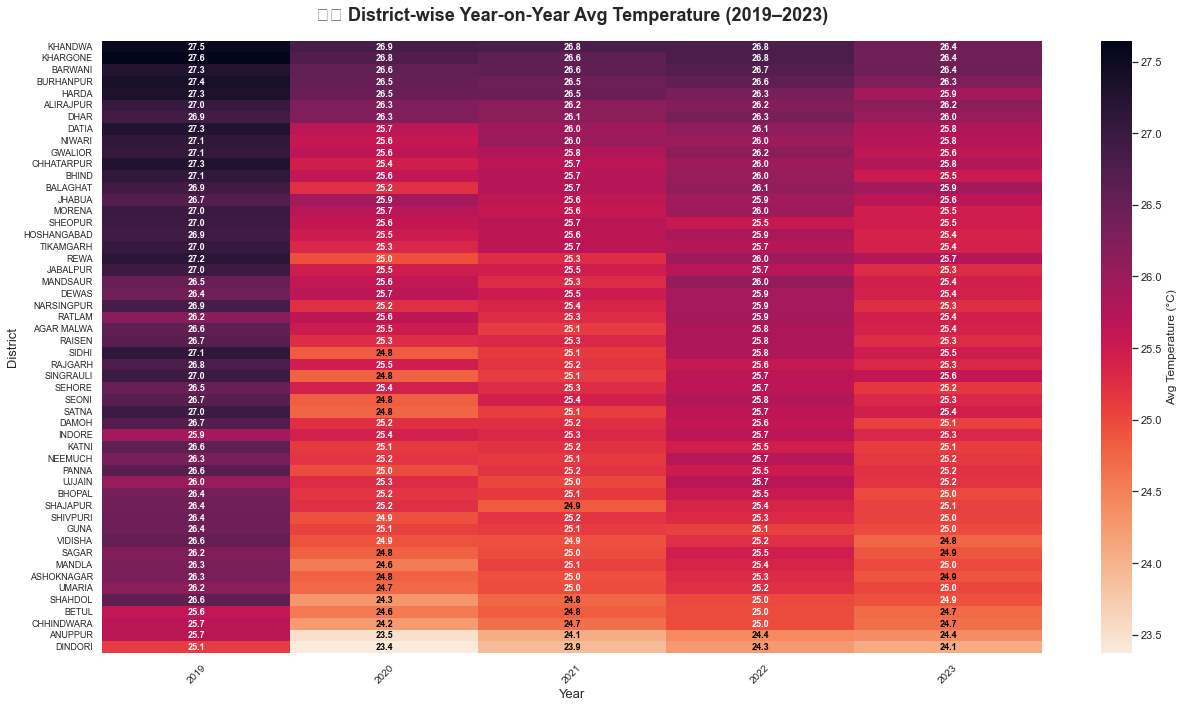

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df = df[(df['year'] >= 2019) & (df['year'] <= 2024)]

# Prepare pivot table
temp_df = df.groupby(['District', 'year'])['mean'].mean().unstack()
temp_df = temp_df.loc[temp_df.mean(axis=1).sort_values(ascending=False).index]

sns.set_theme(style="white")
sns.set(font_scale=1.0)
plt.figure(figsize=(18, 10))

cmap = sns.color_palette("rocket_r", as_cmap=True)

ax = sns.heatmap(
    temp_df,
    cmap=cmap,
    annot=False,
    fmt=".1f",
    linewidths=0,
    linecolor='white',
    cbar_kws={'label': 'Avg Temperature (°C)'}
)

# Annotate values with adaptive text color
for i in range(temp_df.shape[0]):
    for j in range(temp_df.shape[1]):
        value = temp_df.iloc[i, j]
        if pd.notnull(value):
            color_val = cmap((value - temp_df.min().min()) / (temp_df.max().max() - temp_df.min().min()))
            r, g, b = color_val[:3]
            brightness = (r * 299 + g * 587 + b * 114) / 1000
            text_color = 'black' if brightness > 0.5 else 'white'
            ax.text(j + 0.5, i + 0.5, f"{value:.1f}",
                    ha='center', va='center', color=text_color,
                    fontsize=9, fontweight='bold')

# Force all district names to display
ax.set_yticks([i + 0.5 for i in range(len(temp_df.index))])
ax.set_yticklabels(temp_df.index, rotation=0, fontsize=9)

ax.set_title("🌡️ District-wise Year-on-Year Avg Temperature (2019–2023)", fontsize=18, fontweight='bold', pad=20)
ax.set_xlabel("Year", fontsize=13)
ax.set_ylabel("District", fontsize=13)

plt.xticks(rotation=45, fontsize=10)
ax.grid(False)
ax.set_facecolor('white')
plt.tight_layout()
plt.show()


In [40]:
df

,date,mean,min,max,rainfall_mm,District,year
0,2019-01-05,36.624657,29.223230,42.324272,0.0,BHANDARA,2019
1,2019-01-05,34.047997,25.049860,40.839500,0.0,JALGAON,2019
2,2019-01-05,34.302971,25.809732,41.249489,0.0,JALNA,2019
3,2019-01-05,29.423517,20.896387,36.265220,0.0,NASIK,2019
4,2019-01-05,26.526331,20.956125,32.285683,0.0,KOLHAPUR,2019
...,...,...,...,...,...,...,...
61909,2023-12-31,22.374125,16.712961,28.580454,0.0,CHANDRAPUR,2023
61910,2023-12-31,25.651880,19.571894,32.284294,0.0,THANE,2023
61911,2023-12-31,22.057337,16.737757,28.362085,0.0,HINGOLI,2023
61912,2023-12-31,24.744440,19.949335,32.063927,0.0,RAIGAD,2023
